In [1]:
!pip install torch torchvision


In [0]:
import torch
import matplotlib.pyplot as plt 
import numpy as np
import torch.nn.functional as F
from torch import nn
from torchvision import datasets, transforms, models

In [3]:
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
#device = "cpu"
print(device)

cuda:0


In [40]:
!ln -sf /opt/bin/nvidia-smi /usr/bin/nvidia-smi
!pip install gputil
!pip install psutil
!pip install humanize
import psutil
import humanize
import os
import GPUtil as GPU
GPUs = GPU.getGPUs()
# XXX: only one GPU on Colab and isn’t guaranteed
gpu = GPUs[0]
def printm():
 process = psutil.Process(os.getpid())
 print("Gen RAM Free: " + humanize.naturalsize( psutil.virtual_memory().available ), " | Proc size: " + humanize.naturalsize( process.memory_info().rss))
 print("GPU RAM Free: {0:.0f}MB | Used: {1:.0f}MB | Util {2:3.0f}% | Total {3:.0f}MB".format(gpu.memoryFree, gpu.memoryUsed, gpu.memoryUtil*100, gpu.memoryTotal))
printm()

Gen RAM Free: 10.5 GB  | Proc size: 7.2 GB
GPU RAM Free: 2724MB | Used: 8717MB | Util  76% | Total 11441MB


# Importar dataset

In [5]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
#!ls '/content/drive/My Drive/Colab_Notebooks/Resources/trabalho_deep1'
pathXRayImages =  '/content/drive/My Drive/Colab_Notebooks/Resources/trabalho_deep1'

In [0]:
#!ls '/content/drive/My Drive/Colab_Notebooks/Resources/trabalho_deep1/train/NORMAL'

In [0]:
from PIL import Image

std = []

PATHTrain = pathXRayImages + '/train/'
PATHTest = pathXRayImages + '/test/'
PATHVal = pathXRayImages + '/val/'
#files = os.listdir(PATH)
#x = np.array([np.array(Image.open(PATH + fname)) for fname in files])

In [0]:
transform_train = transforms.Compose([transforms.Resize((256,256)),
                                      #transforms.CenterCrop(224),
                                      transforms.RandomCrop(80),
                                      transforms.RandomHorizontalFlip(),
                                      transforms.RandomRotation(10),
                                      transforms.RandomAffine(0,shear=10,scale=(0.8,1.6)),
                                      #transforms.ColorJitter(brightness=0.2,contrast=0.2,saturation=0.2),
                                      transforms.ToTensor(),
                                      transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))])


transform = transforms.Compose([transforms.Resize((256,256)),
                                transforms.ToTensor(),
                                transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))])

training_dataset = datasets.ImageFolder(root=PATHTrain,transform=transform_train)
validation_dataset = datasets.ImageFolder(root=PATHVal,transform=transform)
training_loader = torch.utils.data.DataLoader(dataset=training_dataset,batch_size=50,shuffle=True)
validation_loader = torch.utils.data.DataLoader(dataset=validation_dataset,batch_size=50,shuffle=False)

In [0]:
def im_convert(tensor):
  image = tensor.cpu().clone().detach().numpy()
  image = image.transpose(1,2,0)
  #print(image.shape)
  #retirar a normalização
  image = image * np.array((0.5,0.5,0.5)) + np.array((0.5,0.5,0.5))
  image = image.clip(0,1)
  return image

In [0]:
def getitem(self, item): 
  image, label = self.imgs[item] 
  image = Image.open(image) 
  img = transform(image) 
  return img, label

In [0]:
classes = (
    'NORMAL','PNEUMONIA'
    )

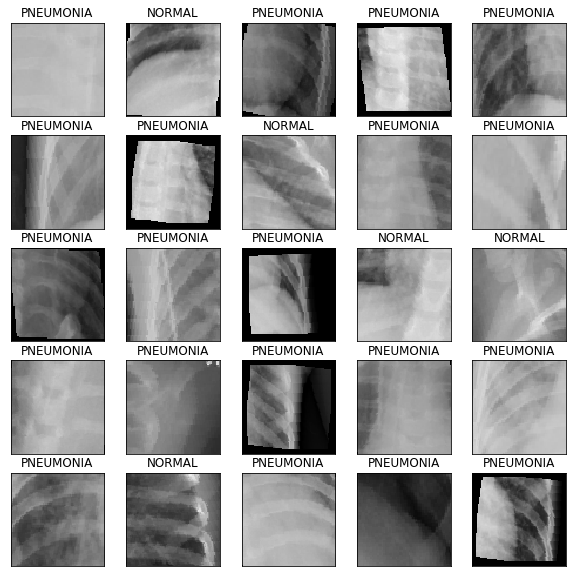

In [280]:
dataiter = iter(training_loader)
images,labels = dataiter.next()

fig = plt.figure(figsize=(10,10))

for idx in np.arange(25):
  ax = fig.add_subplot(5,5,idx+1,xticks=[],yticks=[])
  plt.imshow(im_convert(images[idx]))
  ax.set_title(classes[labels[idx].item()])

In [281]:
model = models.vgg16(pretrained=True)
model



VGG(
  (features): Sequential(
    (0): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU(inplace=True)
    (2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU(inplace=True)
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (5): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (6): ReLU(inplace=True)
    (7): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (8): ReLU(inplace=True)
    (9): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (10): Conv2d(128, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (11): ReLU(inplace=True)
    (12): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (13): ReLU(inplace=True)
    (14): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (15): ReLU(inplace=True)
    (16): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1

In [0]:
for param in model.parameters():
    param.requires_grad = False

#model.fc = nn.Linear(2048, 2)  




In [283]:
#mudando apenas para duas classes
n_inputs = model.classifier[6].in_features
last_layer = nn.Linear(n_inputs,len(classes))
model.classifier[6] = last_layer
model.to(device)
print(model)


VGG(
  (features): Sequential(
    (0): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU(inplace=True)
    (2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU(inplace=True)
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (5): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (6): ReLU(inplace=True)
    (7): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (8): ReLU(inplace=True)
    (9): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (10): Conv2d(128, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (11): ReLU(inplace=True)
    (12): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (13): ReLU(inplace=True)
    (14): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (15): ReLU(inplace=True)
    (16): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1

In [284]:
import time
start_time = time.time()

criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr = 0.0001)

print('levou {} segundos '.format(time.time() - start_time))

levou 0.0006988048553466797 segundos 


In [285]:
CUDA_LAUNCH_BLOCKING=1

import time
start_time = time.time()



epochs = 20

running_loss_history=[]
running_corrects_history=[]

val_running_loss_history=[]
val_running_corrects_history=[]


for e in range(epochs):
  running_loss = 0.0
  running_corrects = 0.0
  val_running_loss = 0.0
  val_running_corrects = 0.0
  
  for inputs, labels in training_loader:
    inputs = inputs.to(device)
    labels = labels.to(device)
    outputs = model(inputs)
    loss = criterion(outputs,labels)
    
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
    
    _,preds = torch.max(outputs,1)    
    running_loss += loss.item()
    running_corrects+= torch.sum(preds == labels.data)    
    
  else:
    with torch.no_grad():
      for val_inputs, val_labels in validation_loader:
        val_inputs = val_inputs.to(device)
        val_labels = val_labels.to(device)
        val_outputs = model(val_inputs)
        val_loss = criterion(val_outputs,val_labels)        
        
        _,val_preds = torch.max(val_outputs,1)
        val_running_loss += val_loss.item()
        val_running_corrects+= torch.sum(val_preds == val_labels.data)  
      
    epoch_loss = running_loss/len(training_loader.dataset)
    #epoch_loss = calcula o loss function atual
    epoch_acc = running_corrects.float()/len(training_loader.dataset)
    #epoch_acc = pega a quantiade de acertos que teve em relacao ao total e seta a porcentagem de acertos
    running_loss_history.append(epoch_loss)
    running_corrects_history.append(epoch_acc)
    
    val_epoch_loss = val_running_loss/len(validation_loader.dataset)
    #epoch_loss = calcula o loss function atual
    val_epoch_acc = val_running_corrects.float()/len(validation_loader.dataset)
    #epoch_acc = pega a quantiade de acertos que teve em relacao ao total e seta a porcentagem de acertos
    val_running_loss_history.append(val_epoch_loss)    
    val_running_corrects_history.append(val_epoch_acc)    
    
    print('epoch: ',str(e+1))
    print('train_loss: {:.4f},{:.4f}'.format(epoch_loss,epoch_acc.item()))
    print('valid_loss: {:.4f},\nvalid_acc {:.4f}'.format(val_epoch_loss,val_epoch_acc.item()))
    #print('difference between loss:', val_epoch_loss-epoch_loss)

    
print('levou {} segundos '.format(time.time() - start_time))

epoch:  1
train_loss: 0.0116,0.7280
valid_loss: 0.0401,
valid_acc 0.5625
epoch:  2
train_loss: 0.0106,0.7529
valid_loss: 0.0427,
valid_acc 0.4375
epoch:  3
train_loss: 0.0099,0.7655
valid_loss: 0.0422,
valid_acc 0.5000
epoch:  4
train_loss: 0.0099,0.7703
valid_loss: 0.0389,
valid_acc 0.5625
epoch:  5
train_loss: 0.0097,0.7736
valid_loss: 0.0388,
valid_acc 0.6875
epoch:  6
train_loss: 0.0097,0.7711
valid_loss: 0.0453,
valid_acc 0.5625
epoch:  7
train_loss: 0.0095,0.7697
valid_loss: 0.0396,
valid_acc 0.6250
epoch:  8
train_loss: 0.0095,0.7795
valid_loss: 0.0366,
valid_acc 0.6250
epoch:  9
train_loss: 0.0095,0.7853
valid_loss: 0.0421,
valid_acc 0.6250
epoch:  10
train_loss: 0.0094,0.7789
valid_loss: 0.0412,
valid_acc 0.6875
epoch:  11
train_loss: 0.0093,0.7818
valid_loss: 0.0381,
valid_acc 0.6875
epoch:  12
train_loss: 0.0096,0.7709
valid_loss: 0.0343,
valid_acc 0.8125
epoch:  13
train_loss: 0.0095,0.7761
valid_loss: 0.0392,
valid_acc 0.6250
epoch:  14
train_loss: 0.0092,0.7880
valid_loss

In [0]:
#training_loss: 0.8267,71.0100
#validation_loss: 0.7724, validation acc 73.7500
#difference between loss: -0.0543566477298737

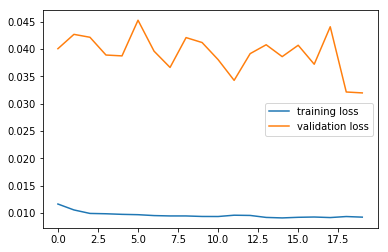

In [286]:
plt.plot(running_loss_history,label='training loss')
plt.plot(val_running_loss_history,label='validation loss')
plt.legend()


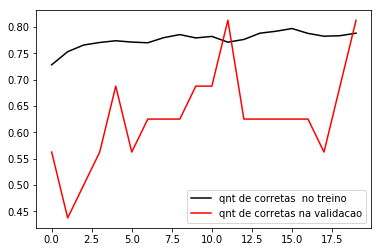

In [287]:
plt.plot(running_corrects_history,label='qnt de corretas  no treino',color="black")
plt.plot(val_running_corrects_history,label='qnt de corretas na validacao', color='red')
plt.legend()

16
acertos: 11 
erros:5


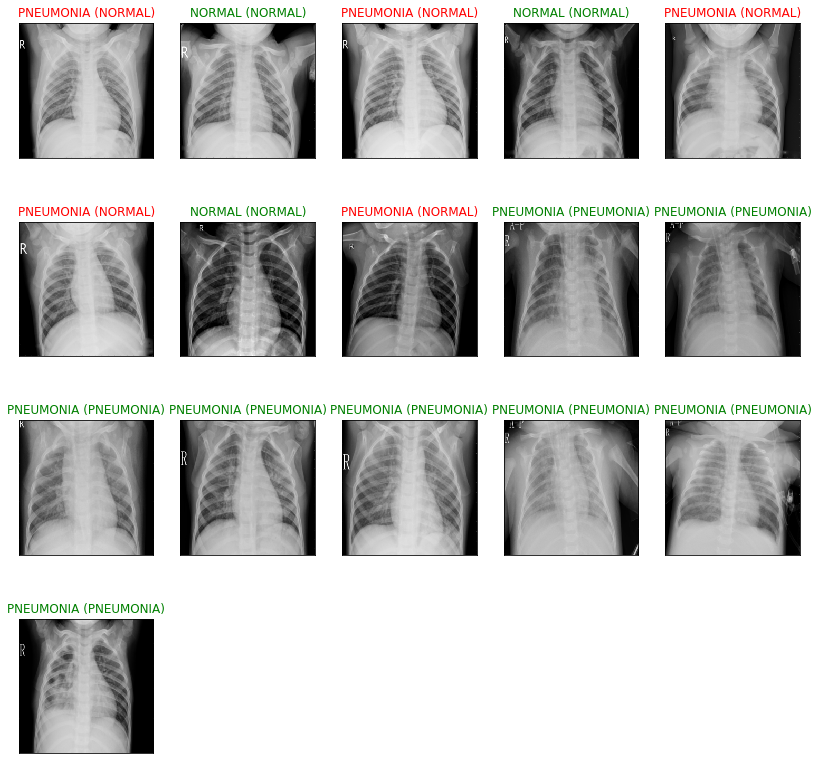

In [288]:
dataiter = iter(validation_loader)
images,labels = dataiter.next()
images = images.to(device)
labels = labels.to(device)
model.eval()
output = model(images)
_,preds = torch.max(output,1)

fig = plt.figure(figsize=(14,14))

acertos = 0
erros = 0

print(len(images))

for idx in np.arange(len(images)):
  ax = fig.add_subplot(4,5,idx+1,xticks=[],yticks=[])
  plt.imshow(im_convert(images[idx]))  
  if preds[idx]==labels[idx]:
    acertos = acertos +1
  else:
    erros = erros +1
  ax.set_title("{} ({})".format(str(classes[preds[idx].item()]),str(classes[labels[idx].item()])),color=('green' if preds[idx]==labels[idx] else "red"))
  
print('acertos: {} \nerros:{}'.format(acertos,erros))


tensor([[3., 5.],
        [0., 8.]])
tensor([0.3750, 1.0000])


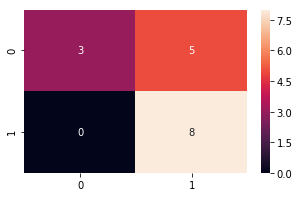

In [289]:
from sklearn.metrics import confusion_matrix
nb_classes = 2

confusion_matrix = torch.zeros(nb_classes, nb_classes)
with torch.no_grad():
    for i, (inputs, classes) in enumerate(validation_loader):
        inputs = inputs.to(device)
        classes = classes.to(device)
        outputs = model(inputs)
        _, preds = torch.max(outputs, 1)
        for t, p in zip(classes.view(-1), preds.view(-1)):
                confusion_matrix[t.long(), p.long()] += 1

print(confusion_matrix)

print(confusion_matrix.diag()/confusion_matrix.sum(1))

import seaborn as sn
import matplotlib.pyplot as plt

plt.figure(figsize = (5,3))
sn.heatmap(confusion_matrix, annot=True)

#LINKS PARA AJUDAR


https://medium.com/unit8-machine-learning-publication/detecting-pneumonia-on-x-ray-images-covnets-and-transfer-learning-6d94b58c6657

https://www.kaggle.com/goelrajat/prediciting-pneumonia-from-chest-xray/code

https://www.kaggle.com/aakashnain/beating-everything-with-depthwise-convolution

https://github.com/naity/pneumonia/blob/master/Pneumonia-colab.ipynb

https://becominghuman.ai/detecting-pneumonia-with-deep-learning-3cf49b640c14

https://github.com/rslim087a/PyTorch-for-Deep-Learning-and-Computer-Vision-Course-All-Codes-/blob/master/PyTorch%20for%20Deep%20Learning%20and%20Computer%20Vision%20Course%20(All%20Codes)/Transfer_Learning.ipynb


